In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/Skyserver.csv"
df = pd.read_csv(url)

In [3]:
df.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [4]:
df.describe()

objid            ra           dec             u             g  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.237650e+18    175.529987     14.836148     18.619355     17.371931   
std    1.577039e+05     47.783439     25.212207      0.828656      0.945457   
min    1.237650e+18      8.235100     -5.382632     12.988970     12.799550   
25%    1.237650e+18    157.370946     -0.539035     18.178035     16.815100   
50%    1.237650e+18    180.394514      0.404166     18.853095     17.495135   
75%    1.237650e+18    201.547279     35.649397     19.259232     18.010145   
max    1.237650e+18    260.884382     68.542265     19.599900     19.918970   

                  r             i             z           run    rerun  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.0   
mean      16.840963     16.583579     16.422833    981.034800    301.0   
std        1.067764      1.141805      1.203188    273.305024      0.0   
min       12.431600     11.947210     11.610410    308.000000    301.0   
25%       16.173333     15.853705     15.618285    752.000000    301.0   
50%       16.858770     16.554985     16.389945    756.000000    301.0   
75%       17.512675     17.258550     17.141447   1331.000000    301.0   
max       24.802040     28.179630     22.833060   1412.000000    301.0   

             camcol         field     specobjid      redshift         plate  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       3.648700    302.380100  1.645022e+18      0.143726   1460.986400   
std        1.666183    162.577763  2.013998e+18      0.388774   1788.778371   
min        1.000000     11.000000  2.995780e+17     -0.004136    266.000000   
25%        2.000000    184.000000  3.389248e+17      0.000081    301.000000   
50%        4.000000    299.000000  4.966580e+17      0.042591    441.000000   
75%        5.000000    414.000000  2.881300e+18      0.092579   2559.000000   
max        6.000000    768.000000  9.468830e+18      5.353854   8410.000000   

                mjd       fiberid  
count  10000.000000  10000.000000  
mean   52943.533300    353.069400  
std     1511.150651    206.298149  
min    51578.000000      1.000000  
25%    51900.000000    186.750000  
50%    51997.000000    351.000000  
75%    54468.000000    510.000000  
max    57481.000000   1000.000000

* Columns u, g, r, i, z, field dont have that many outliers since mean and median are similar
* columns ra, dec, run, redshift, plate have outliers to some extent

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


* There are no null values in the given data

In [6]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [7]:
#spread of some data
sns.distplot(df['u'])

g, r, i, z also will have a similar distribution since they have similar mean, median, min, and max

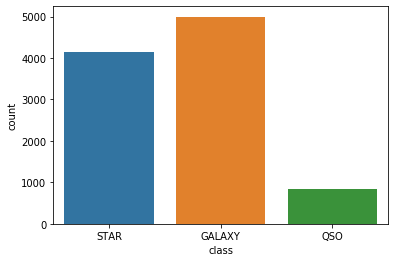

In [8]:
sns.countplot(df['class'])

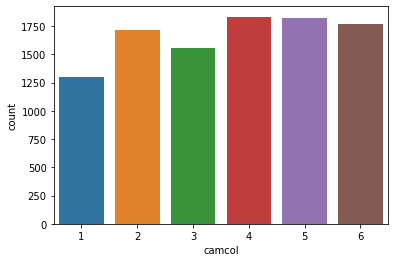

In [9]:
sns.countplot(df['camcol'])

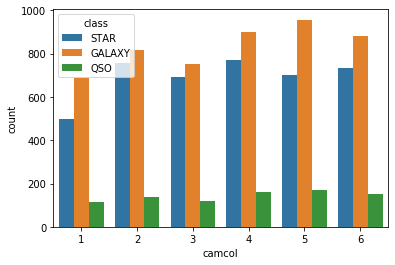

In [10]:
sns.countplot(df['camcol'], hue=df['class'])

In [11]:
cols = df.columns.values

In [12]:
cols1 = ['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun']

In [13]:
cols2 = ['camcol', 'field', 'specobjid', 'redshift', 'plate',
       'mjd', 'fiberid']

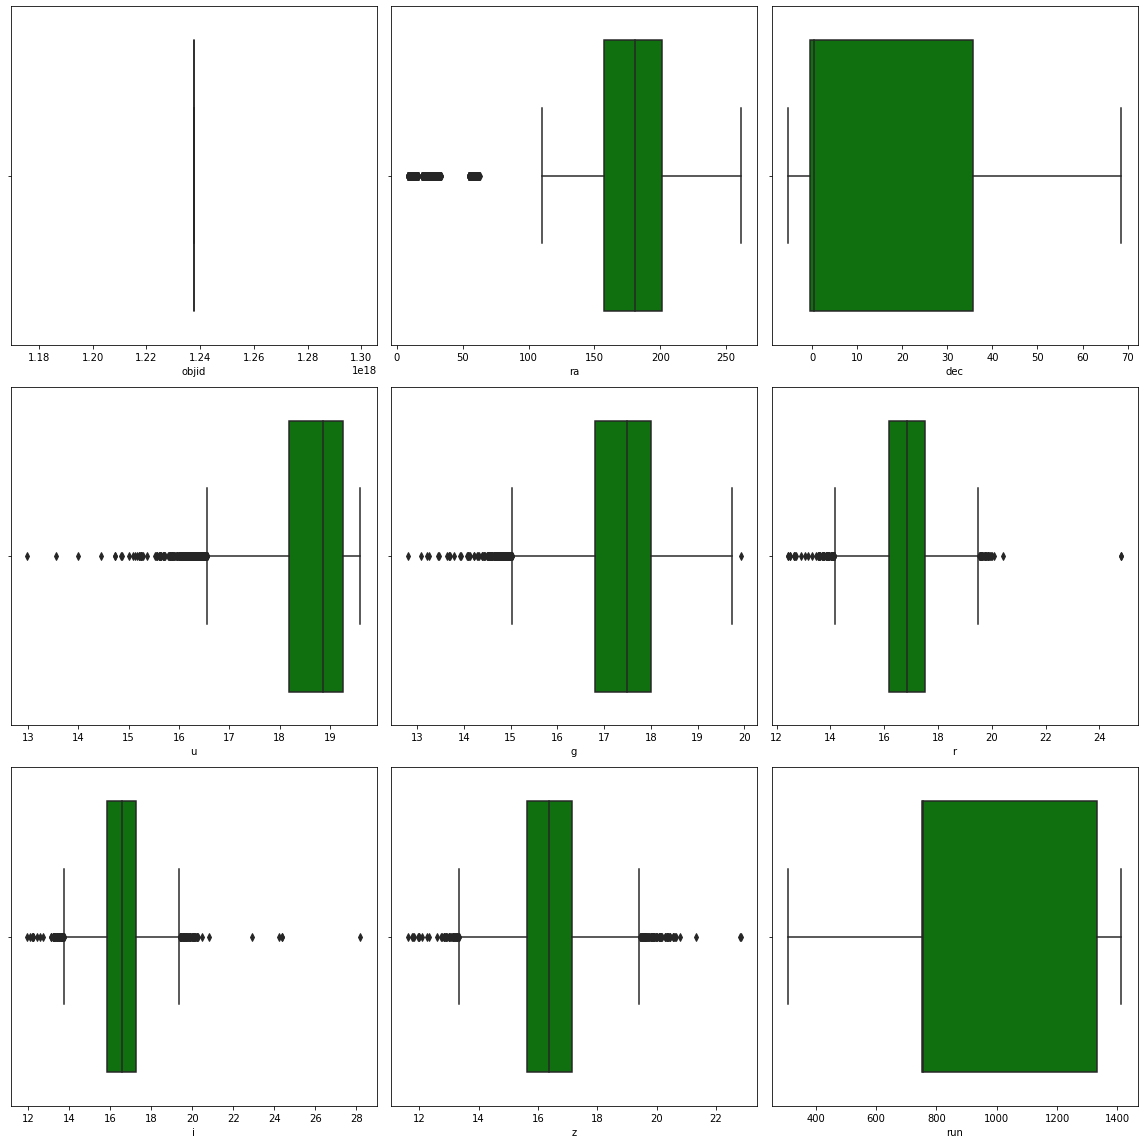

In [14]:
plt.figure(figsize=(16,16))
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[cols1[i]],color='green',orient='h')
    plt.tight_layout()

In [15]:
plt.figure(figsize=(16,16))
for i in range(7):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[cols2[i]],color='green',orient='h')
    plt.tight_layout()

* columns (ra, u, g, r, i, z, redshift, plate) have significant outliers
* columns (dec, run, plate, mjd, specobjid, redshift) are highly skewed as noticed from the above boxplots

In [16]:
#lets check the skewness values for each column
df.skew()

objid        0.000000
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

# Removing outliers

In [17]:
num_cols = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'field', 'plate', 'redshift', 'mjd', 'fiberid']

In [18]:
df.shape

(10000, 18)

In [19]:
temp_df = df[num_cols]
threshold = 3

In [20]:
temp_df.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   run  field  plate  redshift    mjd  fiberid  
0  752    267   3306 -0.000009  54922      491  
1  752    267    323 -0.000055  51615      541  
2  752    268    287  0.123111  52023      513  
3  752    269   3306 -0.000111  54922      510  
4  752    269   3306  0.000590  54922      512

In [21]:
from scipy.stats import zscore
z = np.abs(zscore(temp_df))
z.shape

(10000, 13)

In [22]:
np.where(z>threshold)

(array([  45,  109,  129, ..., 9992, 9994, 9997], dtype=int64),
 array([10, 10, 10, ...,  9,  9,  9], dtype=int64))

In [23]:
df_new = df[(z<threshold).all(axis=1)]
df_new.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [24]:
df_new.shape

(8698, 18)

In [25]:
#Percentage of data lost
((10000-len(df_new))/10000)*100

13.020000000000001

* around 13% of the data is lost if we use this specific value of threshold in zscore method
* therefore we will try using IQR method

In [26]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
iqr

objid        0.000000e+00
ra           4.417633e+01
dec          3.618843e+01
u            1.081197e+00
g            1.195045e+00
r            1.339343e+00
i            1.404845e+00
z            1.523162e+00
run          5.790000e+02
rerun        0.000000e+00
camcol       3.000000e+00
field        2.300000e+02
specobjid    2.542375e+18
redshift     9.249761e-02
plate        2.258000e+03
mjd          2.568000e+03
fiberid      3.232500e+02
dtype: float64

In [27]:
df_new1 = df[~ ( (temp_df<(q1-1.5*iqr)) | (temp_df>(q3+1.5*iqr)) ).any(axis=1)]
df_new1

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598371   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9993  1.237650e+18  131.398915  51.533706  17.79613  16.02621  15.15955   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9993  14.71488  14.33840  1345    301       3    161  5.033460e+17  GALAXY   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9993  0.055515    447  51877      249  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[7978 rows x 18 columns]

In [28]:
#Percentage of data lost
((10000-len(df_new1))/10000)*100

20.22

* IQR method removes upwards of 20% of the data 
* so we try using zscore with a higher threshold value

In [29]:
threshold = 3.43
z1 = np.abs(zscore(temp_df))
np.where(z1>threshold)

(array([  45,  109,  129,  135,  160,  243,  259,  287,  291,  308,  313,
         313,  333,  434,  435,  466,  477,  494,  524,  533,  562,  612,
         667,  688,  743,  749,  751,  760,  774,  818,  818,  818,  818,
         818,  824,  833,  898,  902,  905,  926,  927,  931,  974, 1054,
        1076, 1115, 1145, 1152, 1156, 1169, 1179, 1186, 1187, 1191, 1193,
        1241, 1318, 1373, 1457, 1469, 1495, 1514, 1521, 1534, 1537, 1579,
        1629, 1632, 1632, 1632, 1632, 1632, 1656, 1710, 1723, 1723, 1728,
        1737, 1737, 1737, 1737, 1737, 1741, 1821, 1847, 1857, 1857, 1858,
        1858, 1858, 1876, 1962, 2096, 2130, 2130, 2178, 2178, 2178, 2178,
        2247, 2280, 2301, 2319, 2431, 2467, 2498, 2533, 2559, 2568, 2587,
        2615, 2620, 2627, 2635, 2689, 2690, 2701, 2704, 2804, 2817, 2819,
        2832, 2856, 2897, 2960, 2976, 2997, 3028, 3029, 3093, 3098, 3116,
        3141, 3142, 3145, 3147, 3151, 3156, 3156, 3156, 3156, 3156, 3158,
        3268, 3270, 3271, 3286, 3295, 

In [30]:
df_new2 = df[(z1<threshold).all(axis=1)]
df_new2

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598371   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[9508 rows x 18 columns]

In [31]:
#Percentage of data lost
((10000-len(df_new2))/10000)*100

4.92

The data lost is less than 5% for zscore method with threshold value of 3.45, so we go ahead with this method

# Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['class']:
    df_new2[col] = label_encoder.fit_transform(df_new2[col])
df_new2

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598371   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid  class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18      2   
1     16.48922  16.39150   752    301       4    267  3.638140e+17      2   
2     17.08732  16.80125   752    301       4    268  3.232740e+17      0   
3     15.98233  15.90438   752    301       4    269  3.722370e+18      2   
4     16.55492  16.61326   752    301       4    269  3.722370e+18      2   
...        ...       ...   ...    ...     ...    ...           ...    ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17      0   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17      0   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18      2   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17      0   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17      0   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[9508 rows x 18 columns]

In [33]:
plt.figure(figsize=(16,16))
sns.heatmap(df_new2.corr(),annot=True, vmin=-1, vmax=1)

* from the above heatmap it is evident that mjd, plate, redshift, sepcobjid, z, i, g, u explain a good amount of variation in the class field

In [34]:
df_new2.reset_index(inplace=True,drop=True)

# Removing Skewness 

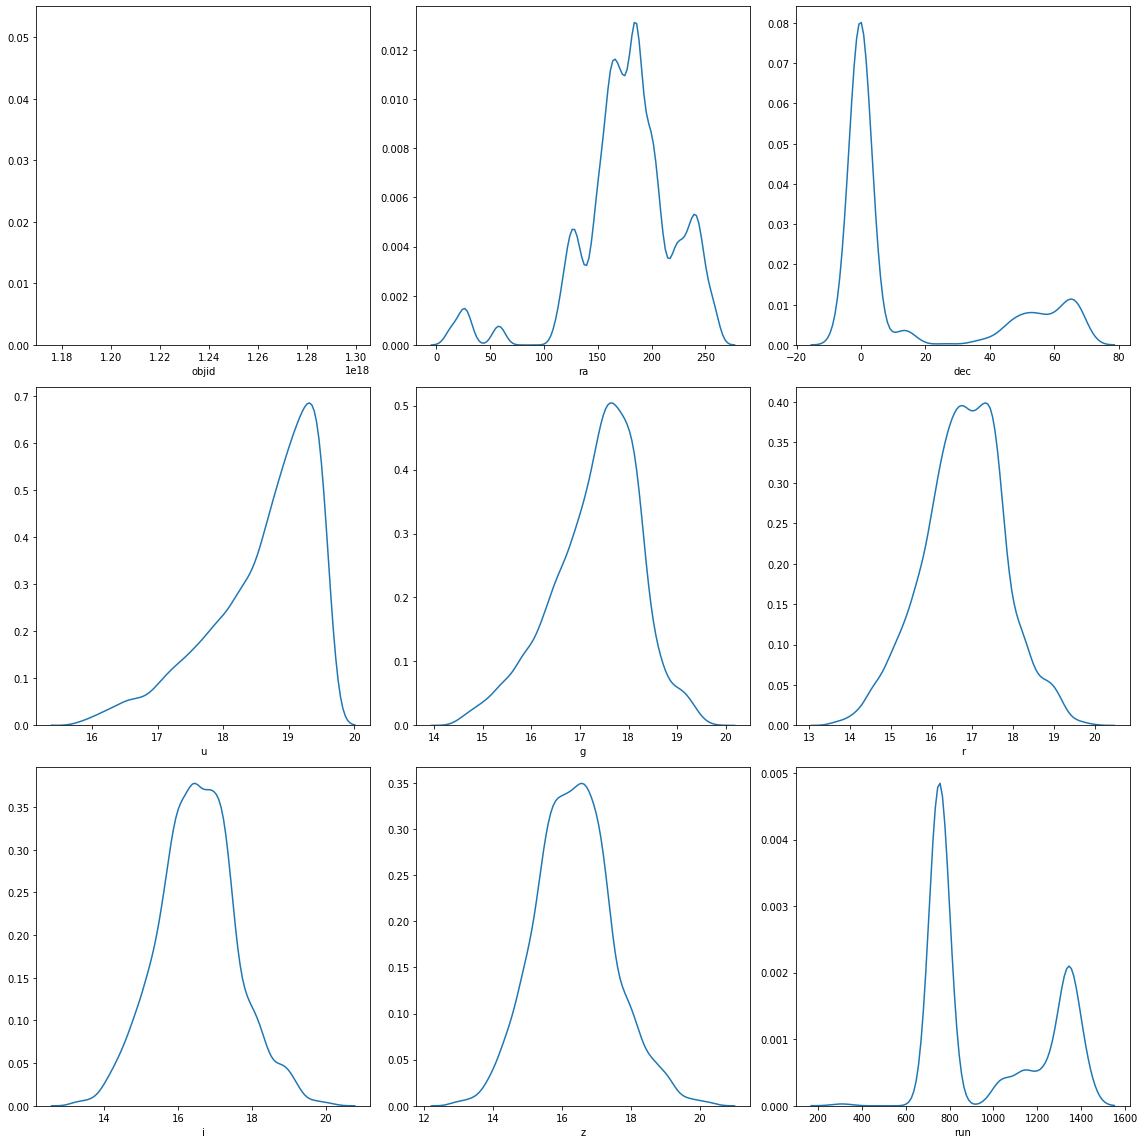

In [35]:
plt.figure(figsize=(16,16))
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.distplot(df_new2[cols[i]],hist = False)
    plt.tight_layout()

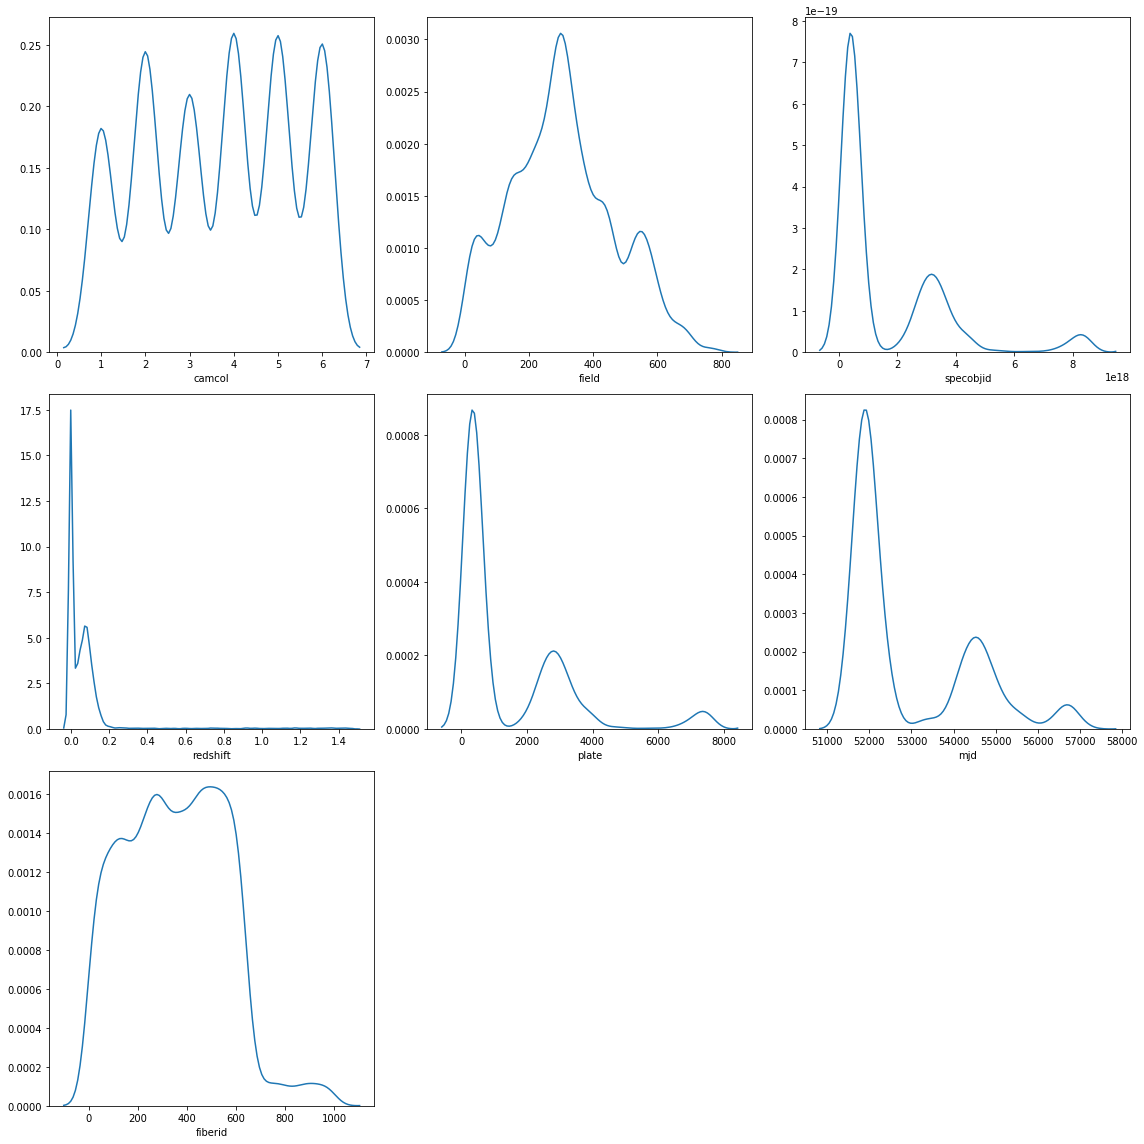

In [36]:
plt.figure(figsize=(16,16))
for i in range(7):
    plt.subplot(3,3,i+1)
    sns.distplot(df_new2[cols2[i]],hist = False)
    plt.tight_layout()

In [37]:
df_new2.skew()

objid        1.000158
ra          -1.103243
dec          1.218151
u           -1.045232
g           -0.524801
r           -0.132647
i            0.085652
z            0.199331
run          0.435482
rerun        0.000000
camcol      -0.105853
field        0.261603
specobjid    1.821318
class        0.195705
redshift     4.729743
plate        1.821299
mjd          1.053651
fiberid      0.280397
dtype: float64

* skewness of within +/- 0.5 is acceptable
* ra, dec, u, g, redshift, specobjid, mjd, plate are skewed

In [38]:
# we can drop rerun and objectid as they have one value
df_new2.drop(['rerun','objid'],axis=1,inplace=True)
df_new2.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   run  camcol  field     specobjid  class  redshift  plate    mjd  fiberid  
0  752       4    267  3.722360e+18      2 -0.000009   3306  54922      491  
1  752       4    267  3.638140e+17      2 -0.000055    323  51615      541  
2  752       4    268  3.232740e+17      0  0.123111    287  52023      513  
3  752       4    269  3.722370e+18      2 -0.000111   3306  54922      510  
4  752       4    269  3.722370e+18      2  0.000590   3306  54922      512

In [39]:
sns.pairplot(df_new2)

In [40]:
df_new2.drop(['specobjid'],axis=1,inplace=True)

In [41]:
# since columns (u,r,z,i,g) are similar we can reduce them to 2 or 3 features using pca
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_new2[['u', 'g', 'r', 'i', 'z']])

In [42]:
# concatenate them to the dataframe
df_new2 = pd.concat((df_new2, pd.DataFrame(df_pca)), axis = 1)

In [43]:
# drop the old columns
df_new2.drop(['u', 'g', 'r', 'i', 'z'],axis=1,inplace=True)
df_new2

ra        dec   run  camcol  field  class  redshift  plate  \
0     183.531326   0.089693   752       4    267      2 -0.000009   3306   
1     183.598371   0.135285   752       4    267      2 -0.000055    323   
2     183.680207   0.126185   752       4    268      0  0.123111    287   
3     183.870529   0.049911   752       4    269      2 -0.000111   3306   
4     183.883288   0.102557   752       4    269      2  0.000590   3306   
...          ...        ...   ...     ...    ...    ...       ...    ...   
9503  131.316413  51.539547  1345       3    161      0  0.027583    447   
9504  131.306083  51.671341  1345       3    162      0  0.117772    447   
9505  131.552562  51.666986  1345       3    162      2 -0.000402   7303   
9506  131.477151  51.753068  1345       3    163      0  0.014019    447   
9507  131.665012  51.805307  1345       3    163      0  0.118417    447   

        mjd  fiberid         0         1         2  
0     54922      491  1.393958 -1.356317 -0.282022  
1     51615      541  0.096442  0.003924 -0.149633  
2     52023      513 -1.400948 -0.546952  0.150599  
3     54922      510  1.353273  0.585209 -0.002533  
4     54922      512  0.762173  1.314024 -0.384622  
...     ...      ...       ...       ...       ...  
9503  51877      246 -0.322768 -0.099652 -0.048935  
9504  51877      228 -0.352673  0.450480  0.161978  
9505  57013      622 -1.575653  0.437084 -0.108369  
9506  51877      229 -1.488764  0.160689  0.060172  
9507  51877      233  0.826795 -1.089813 -0.007977  

[9508 rows x 13 columns]

In [44]:
# split the target variable
x = df_new2.drop('class',axis=1)
y = df_new2.loc[:,'class']

In [45]:
# Removing skewness
from sklearn.preprocessing import power_transform
transf = pd.DataFrame(power_transform(x[['redshift', 'ra', 'dec', 'plate', 'mjd']],method='yeo-johnson'))
transf.rename({0: 'redshift', 1: 'ra', 2: 'dec', 3: 'plate', 4: 'mjd'}, axis=1, inplace = True)
x.drop(['redshift', 'ra', 'dec', 'plate', 'mjd'],axis=1 ,inplace=True)
x = pd.concat((x, transf), axis=1)
x

run  camcol  field  fiberid         0         1         2  redshift  \
0      752       4    267      491  1.393958 -1.356317 -0.282022 -0.988232   
1      752       4    267      541  0.096442  0.003924 -0.149633 -0.989571   
2      752       4    268      513 -1.400948 -0.546952  0.150599  1.157322   
3      752       4    269      510  1.353273  0.585209 -0.002533 -0.991195   
4      752       4    269      512  0.762173  1.314024 -0.384622 -0.970822   
...    ...     ...    ...      ...       ...       ...       ...       ...   
9503  1345       3    161      246 -0.322768 -0.099652 -0.048935 -0.280727   
9504  1345       3    162      228 -0.352673  0.450480  0.161978  1.104771   
9505  1345       3    162      622 -1.575653  0.437084 -0.108369 -0.999691   
9506  1345       3    163      229 -1.488764  0.160689  0.060172 -0.605618   
9507  1345       3    163      233  0.826795 -1.089813 -0.007977  1.111248   

            ra       dec  plate  mjd  
0     0.054146 -0.279285    0.0  0.0  
1     0.055839 -0.267610    0.0  0.0  
2     0.057906 -0.269910    0.0  0.0  
3     0.062716 -0.289800    0.0  0.0  
4     0.063038 -0.275951    0.0  0.0  
...        ...       ...    ...  ...  
9503 -1.122077  1.348479    0.0  0.0  
9504 -1.122281  1.349968    0.0  0.0  
9505 -1.117416  1.349919    0.0  0.0  
9506 -1.118905  1.350890    0.0  0.0  
9507 -1.115194  1.351478    0.0  0.0  

[9508 rows x 12 columns]

# Model 

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_c = sc.fit_transform(x)
x_c = pd.DataFrame(x_c)

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "SVC" : {'model':SVC(),
             'params':{'kernel' :['poly', 'rbf', 'sigmoid'],
                       'gamma':['scale', 'auto']
                      },
            },
    "Decision Tree" : {'model':DecisionTreeClassifier(),
                       'params':{'n_estimators':[50,100,150],
                                 'criterion' :['gini','entropy'],
                                 'max_depth' : [5,8,50,100,150],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
    "Random Forest" : {'model':RandomForestClassifier(),
                       'params':{'n_estimators':[50,100],
                                 'max_depth':[5,8,50], 
                                 'min_samples_leaf':[2,5,10]
                                }
                      },
    "K Nearest Neighbors" : {'model':KNeighborsClassifier(),
                             'params':{'n_neighbors':[5,10,15],
                                       'weights':['uniform','distance'],
                                       'metric':['euclidean','manhattan','minkowski']
                                      }
                            }
}

In [47]:
max_scr = 0

for r_s in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_c,y,random_state=r_s,test_size=0.20)
    for i,j in models.items():
        j['model'].fit(x_train,y_train)
        pred_test = j['model'].predict(x_test)
        acc = accuracy_score(y_test,pred_test)
        if acc > max_scr:
            max_scr = acc
            best_model = j['model']
            best_r_s = r_s
print("Model : ",best_model)
print("Score : ",max_scr)
print("Random State : ",r_s)

Model :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Score :  0.9963196635120926
Random State :  99


# RANDOM FOREST CLASSIFIER IS THE BEST MODEL WITH ACCURACY SCORE OF 0.99

In [48]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x_c,y,random_state=99,test_size=0.20)
grid = GridSearchCV(models['Random Forest']['model'], models['Random Forest']['params'], cv=4, scoring = 'accuracy')
grid.fit(x_train,y_train)
print({
    'model': 'Random Forest',
    'best_score' : grid.best_score_,
    'best_params' : grid.best_params_
})

{'model': 'Random Forest', 'best_score': 0.9913228468496573, 'best_params': {'max_depth': 50, 'min_samples_leaf': 5, 'n_estimators': 100}}
